In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    compress_repeated_epochs,
    batch_analysis,
    add_new_deep_sup,
    custom_plots
)
from ripple_heterogeneity.replay import replay_run, replay_fig, replay_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import ListedColormap
from neo.rawio import neuroscoperawio

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'D:\github\ad_ied\results'

Cupy is not installed or GPU is not detected. Ignore this message if not using GPU
c:\Users\Cornell\anaconda3\envs\ad_ied\lib\site-packages\replay_trajectory_classification\likelihoods\multiunit_likelihood.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
session = r"D:\github\ad_ied\results\replay_v3\X__AD_sessions_AZ12_AZ12_210323_sess3.pkl"
with open(session, "rb") as f:
    results = pickle.load(f)

In [3]:
class LoadLfp(object):
    def __init__(
        self,
        basepath,
        channels
    ):
        self.basepath = basepath
        self.channels = channels
        self.get_xml_data()
        self.load_lfp()

    def get_xml_data(self):
        nChannels, fs, fs_dat, shank_to_channel = loading.loadXML(self.basepath)
        self.nChannels = nChannels
        self.fs = fs
        self.fs_dat = fs_dat
        self.shank_to_channel = shank_to_channel

    def load_lfp(self):
        lfp, timestep = loading.loadLFP(
            self.basepath,
            n_channels=self.nChannels,
            channel=self.channels,
            frequency=self.fs,
            ext="lfp",
        )
        self.lfp = nel.AnalogSignalArray(
            data=lfp.T,
            timestamps=timestep,
            fs=self.fs,
            support=nel.EpochArray(np.array([min(timestep), max(timestep)])),
        )

basepath = r"X:\AD_sessions\AZ12\AZ12_210323_sess3"
lfp = LoadLfp(basepath,4)

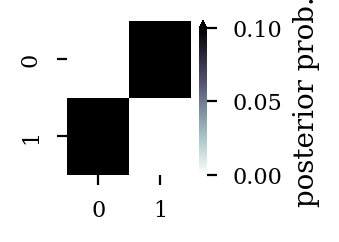

In [15]:
x = [[0,.1], [.1,0]]
plt.figure(figsize=(1,1))
sns.heatmap(x,cmap="bone_r",cbar_kws={'label': 'posterior prob.',"extend":'max'})

plt.savefig(
    os.path.join(fig_save_path,"colorbar.svg"),
    dpi=300,
    bbox_inches="tight",
)

169


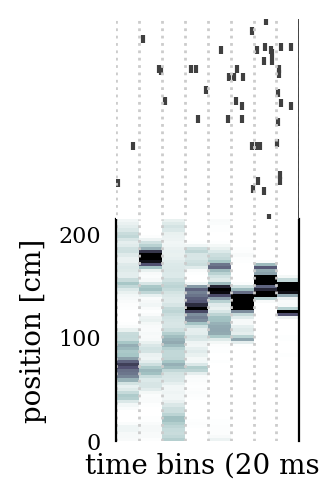

373


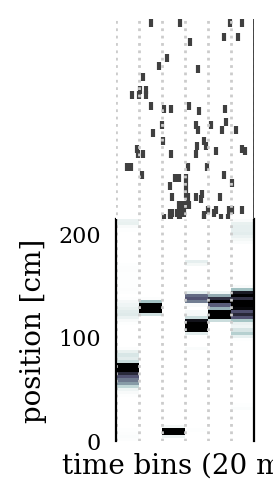

567


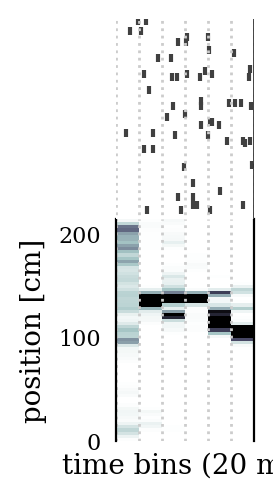

679


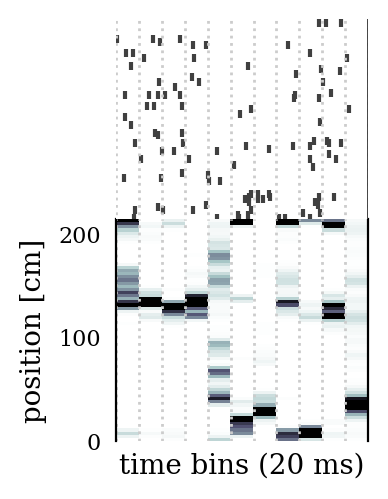

694


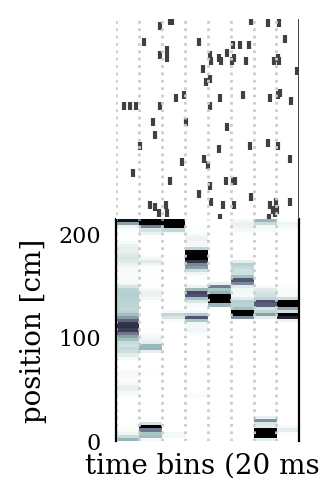

756


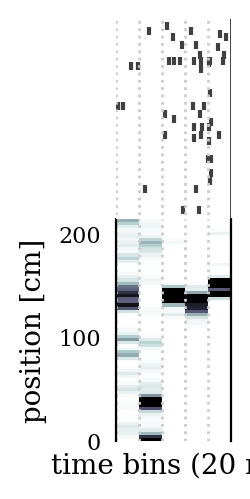

916


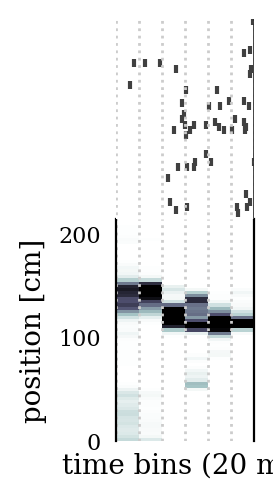

970


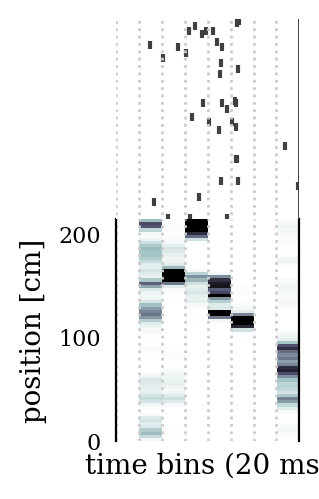

1081


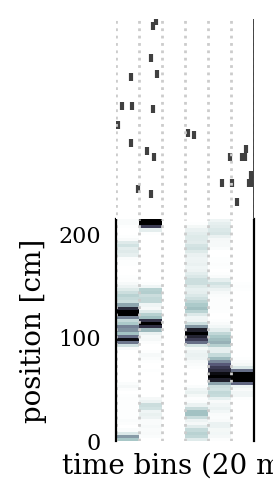

1101


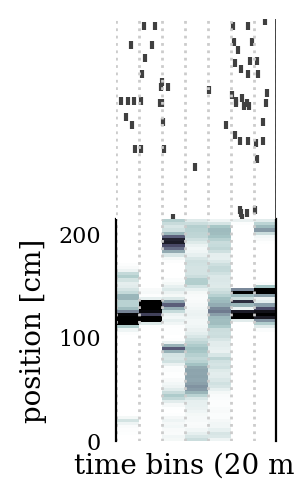

1207


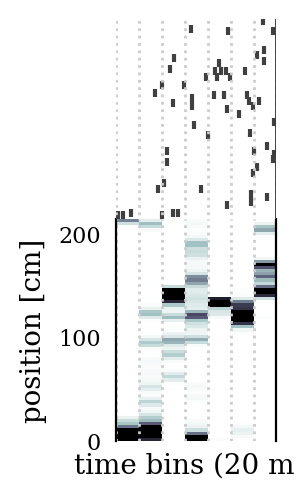

1252


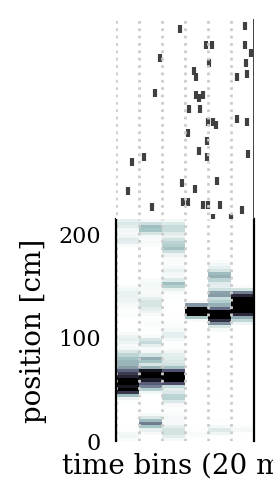

1349


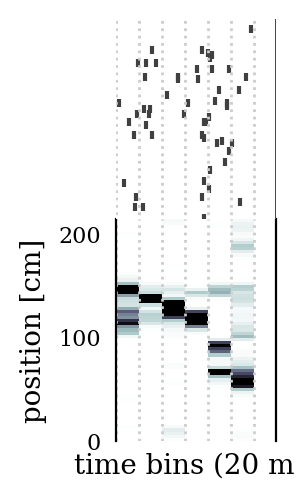

1352


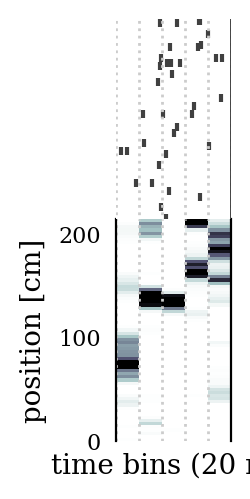

1423


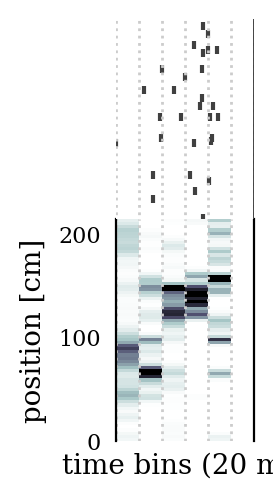

1487


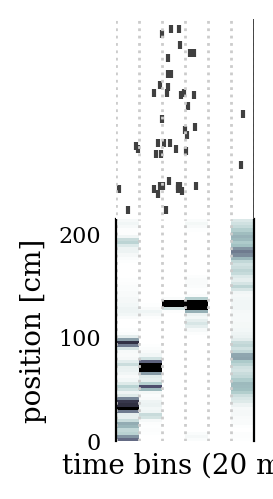

1532


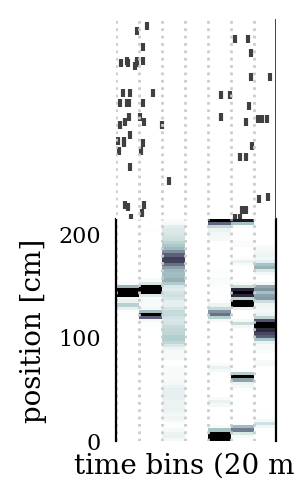

1570


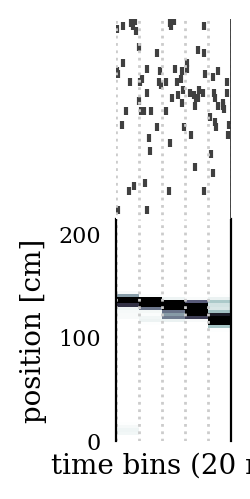

1588


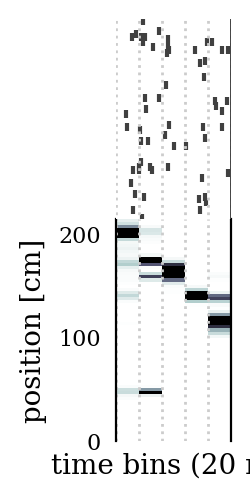

1618


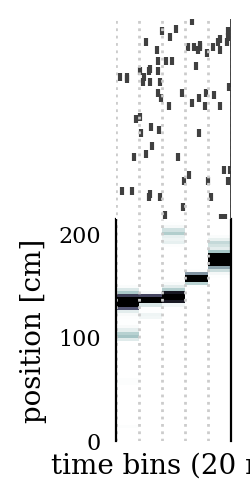

1633


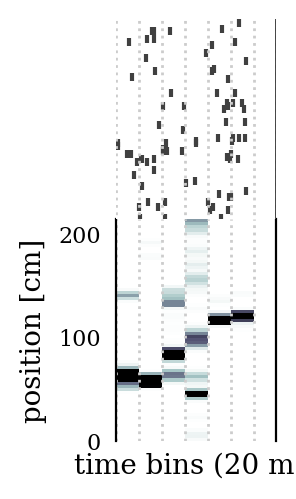

1649


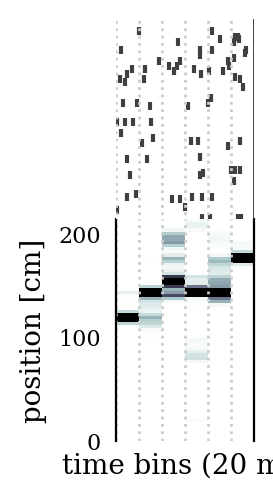

1708


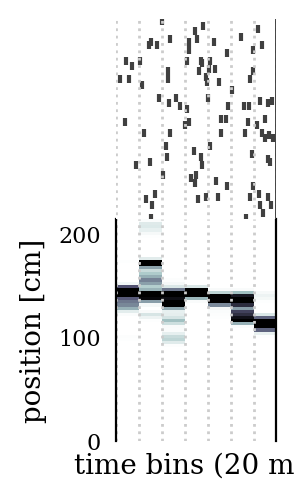

1710


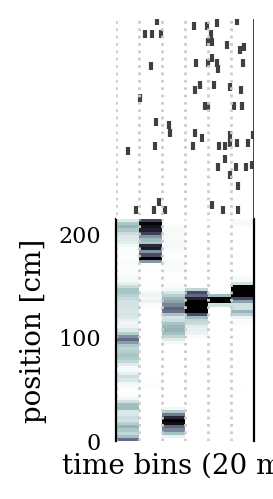

1754


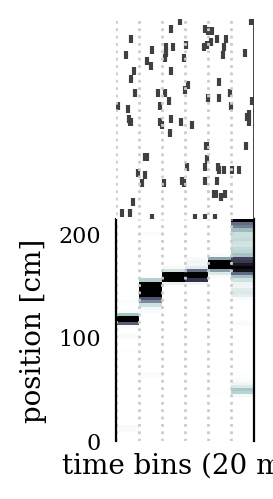

1796


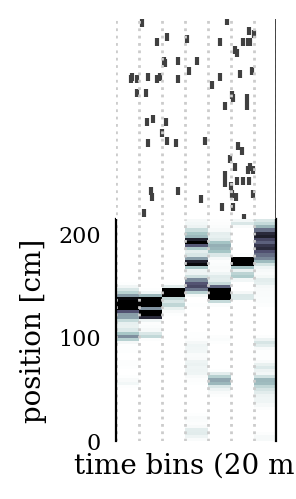

1857


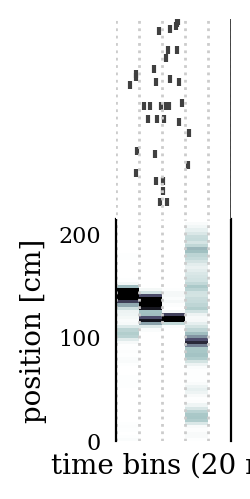

1875


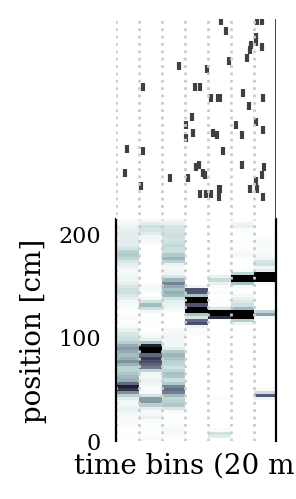

1933


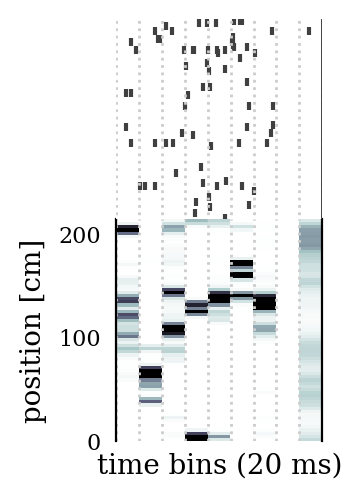

1958


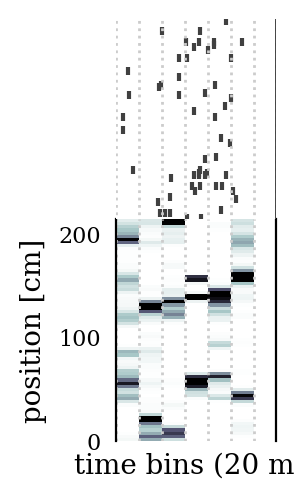

1979


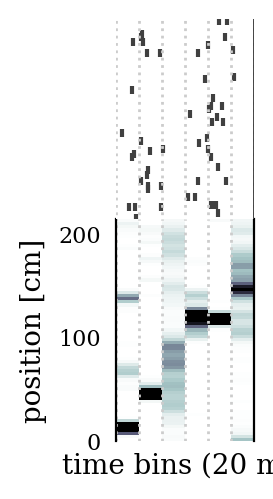

2032


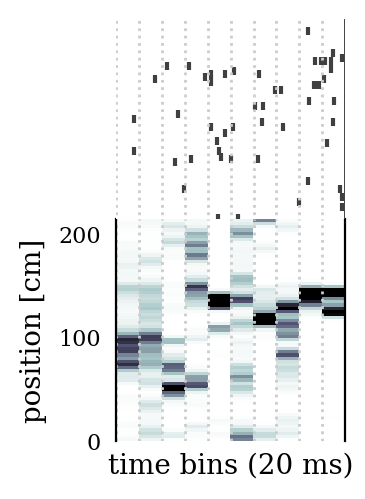

2132


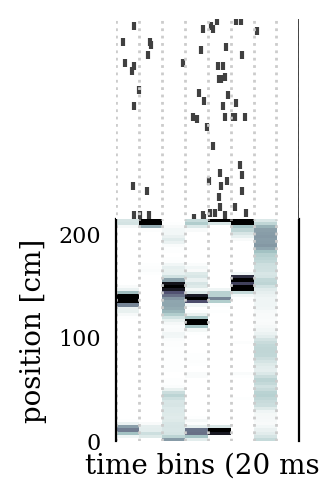

2142


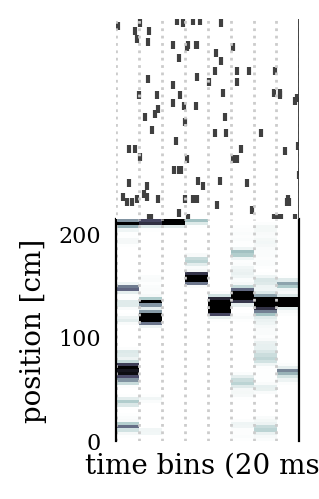

2147


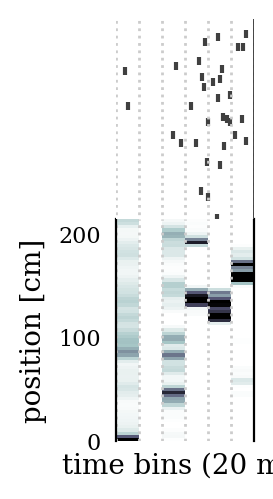

2173


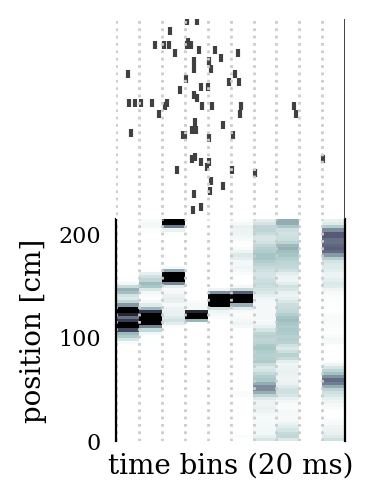

2191


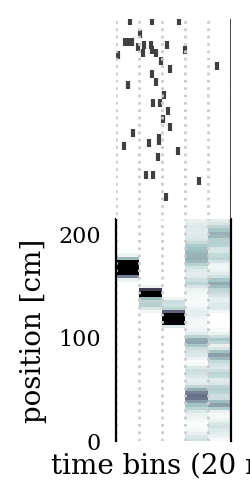

2203


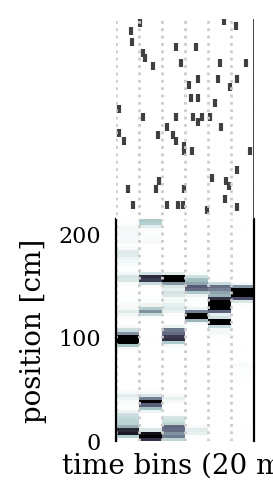

2214


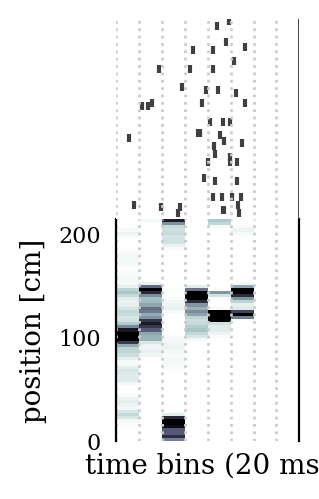

2230


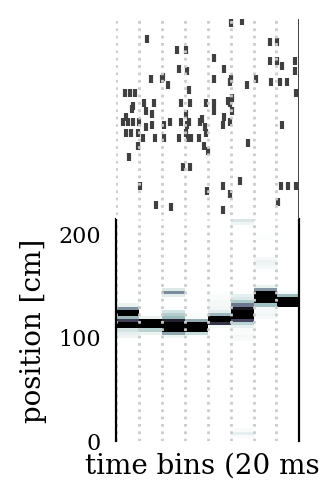

2231


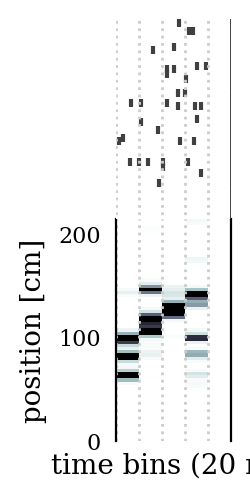

2233


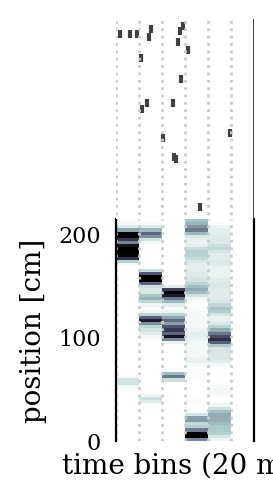

2237


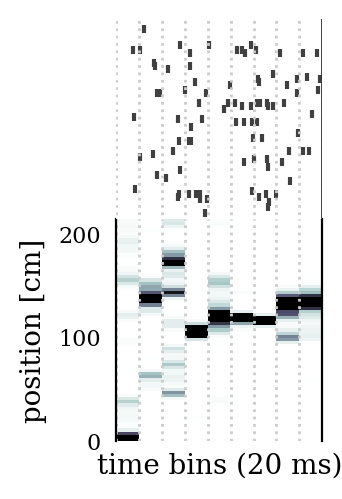

2273


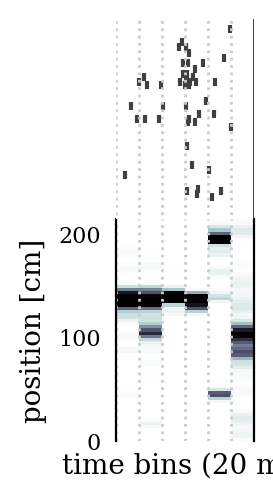

2284


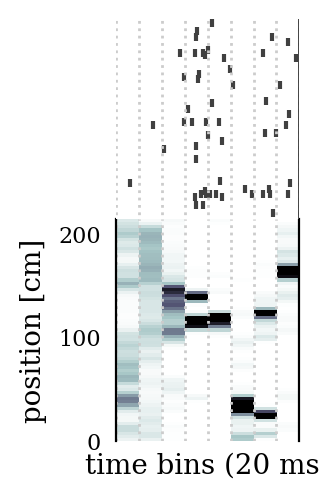

2337


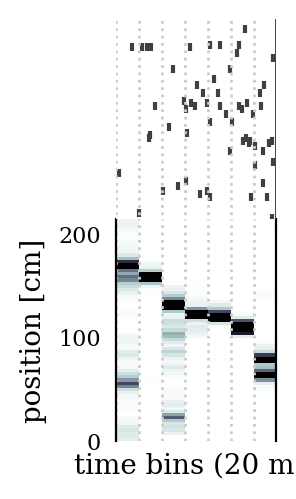

2353


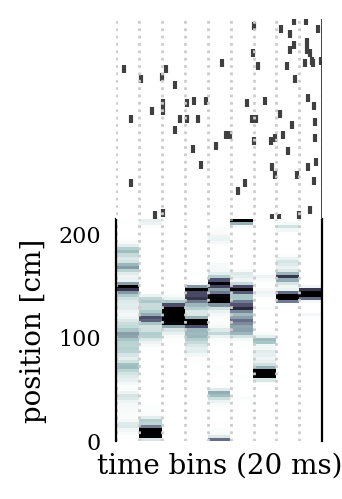

2431


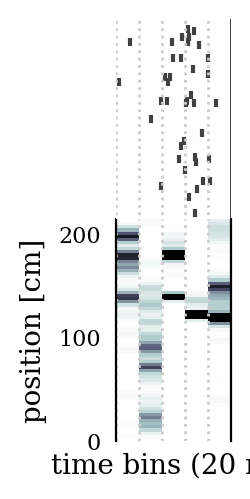

2505


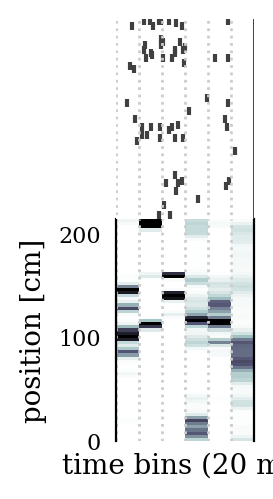

2529


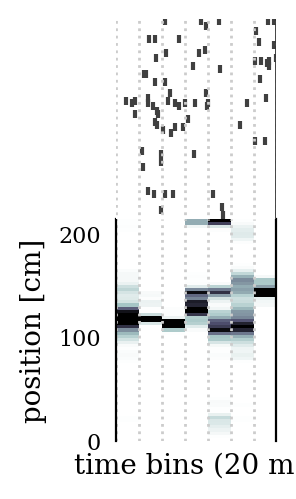

2558


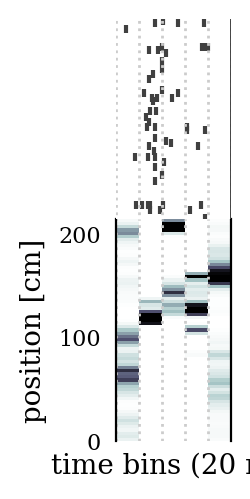

2566


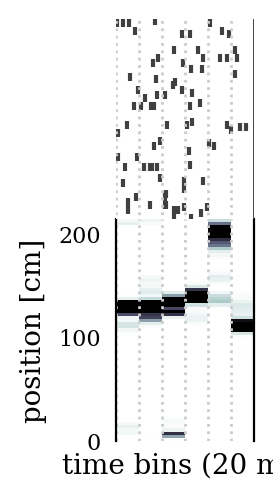

2570


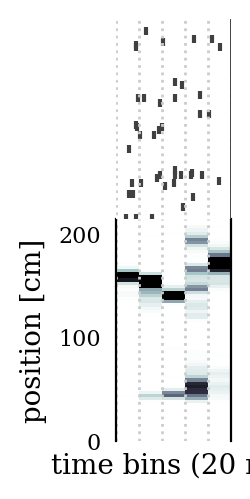

2615


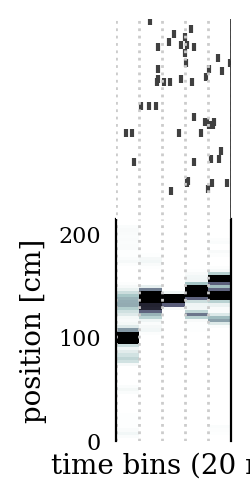

2693


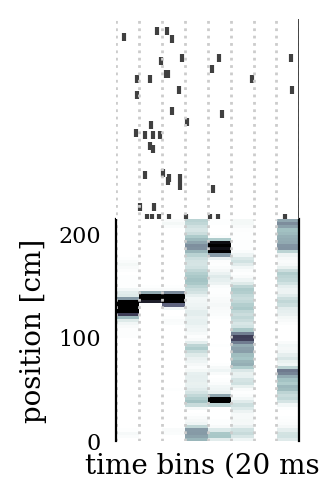

2695


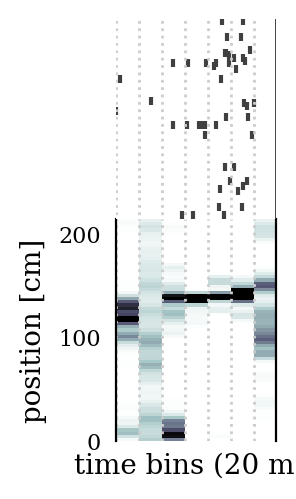

2842


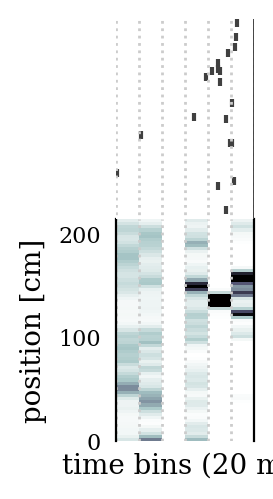

2908


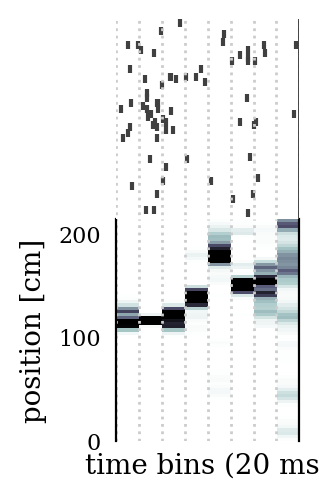

2971


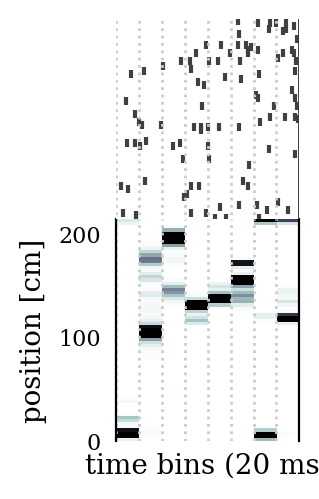

2987


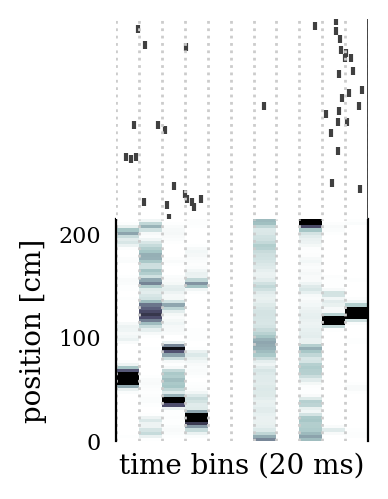

3079


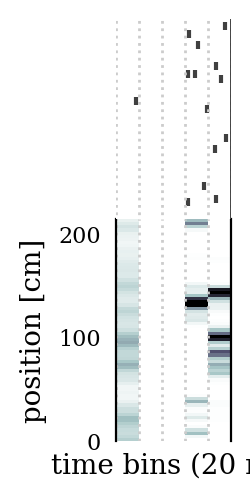

3198


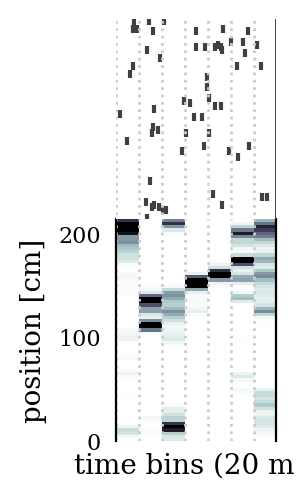

3211


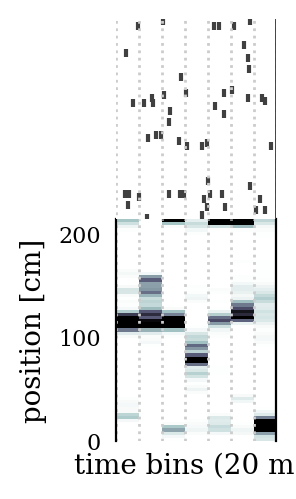

3226


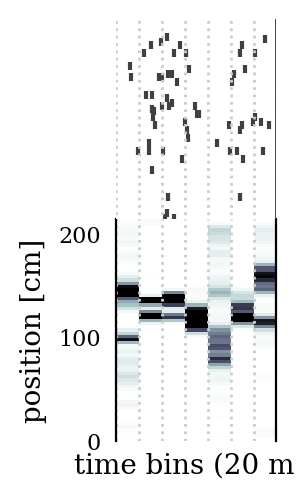

3271


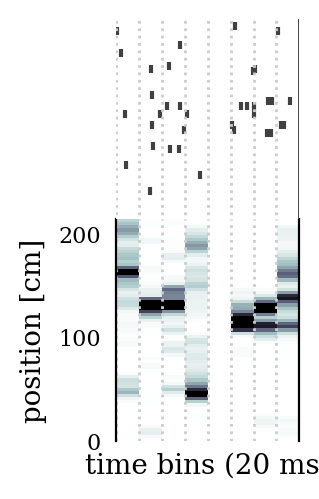

3355


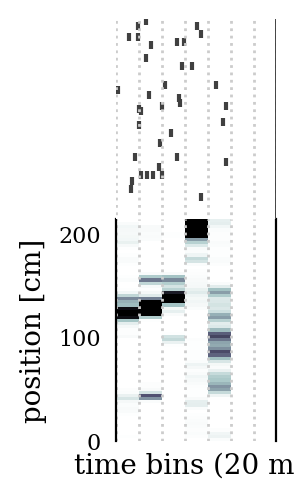

3418


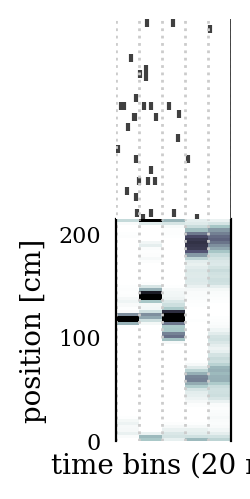

3419


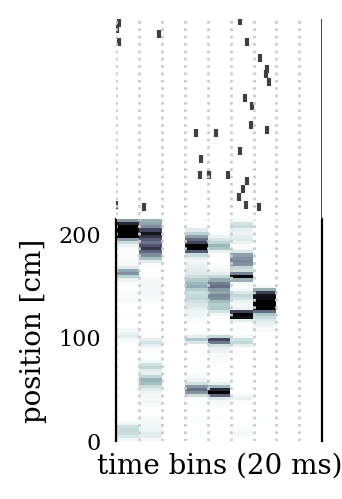

3468


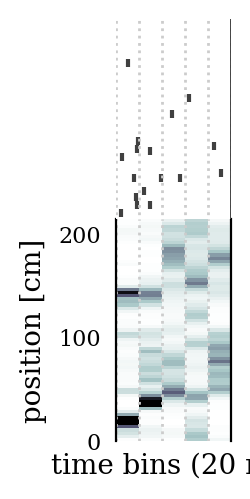

3548


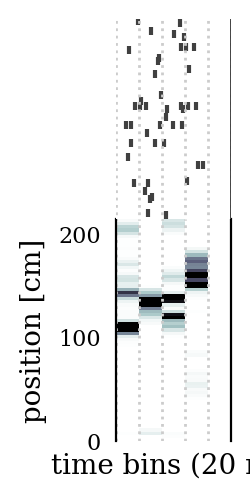

3673


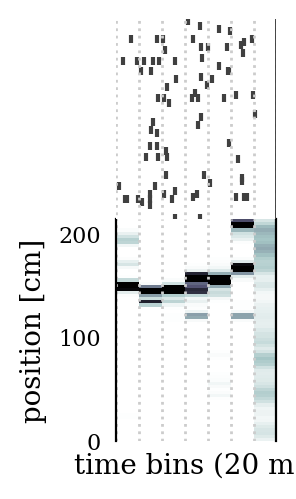

3686


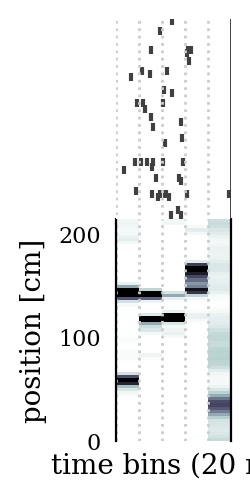

3690


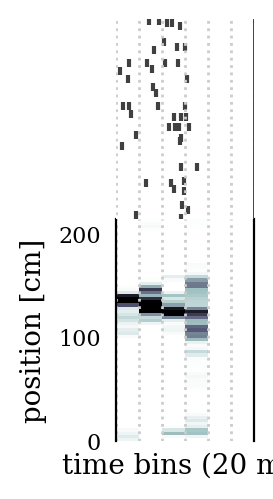

3741


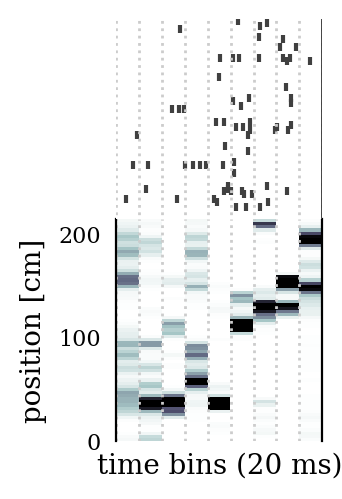

3907


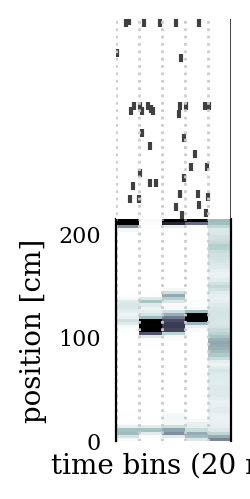

3933


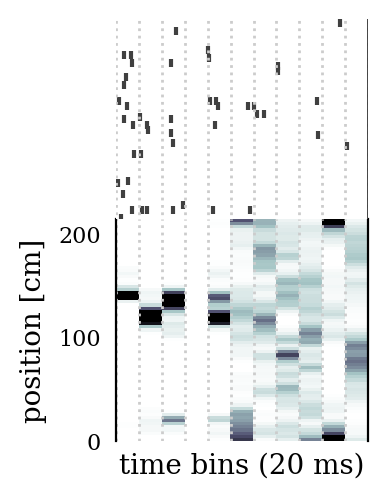

3965


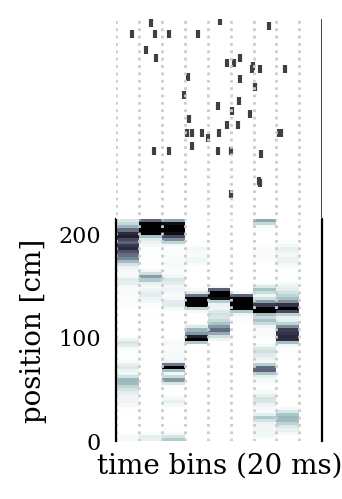

3970


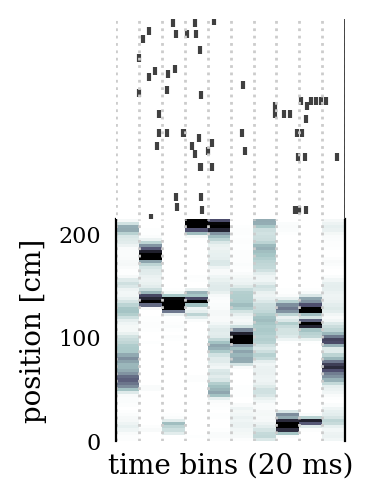

3985


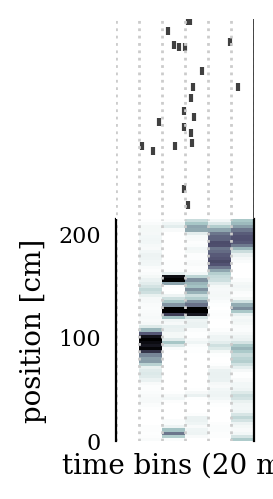

3996


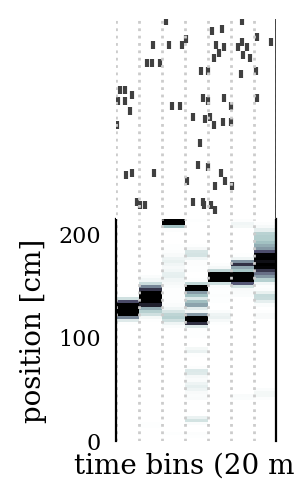

4024


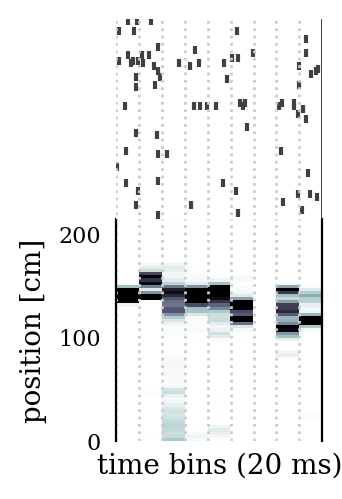

4148


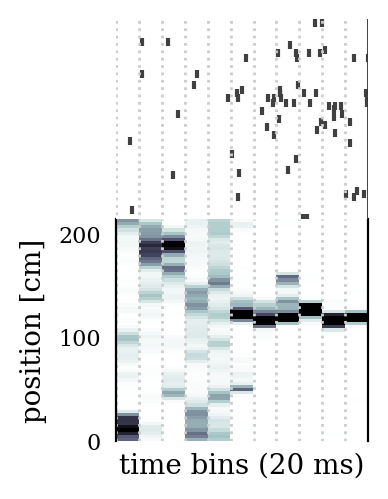

4295


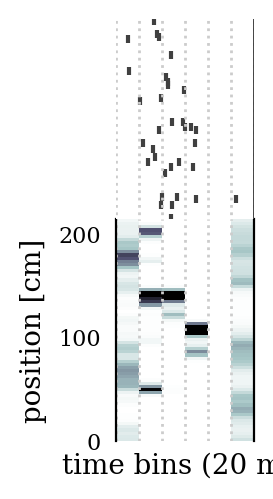

4307


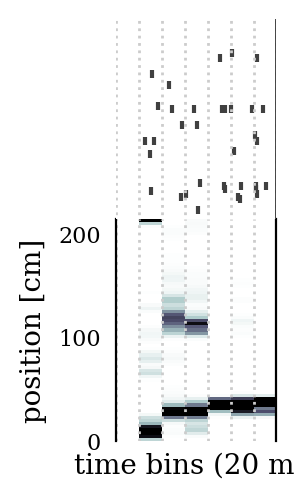

4323


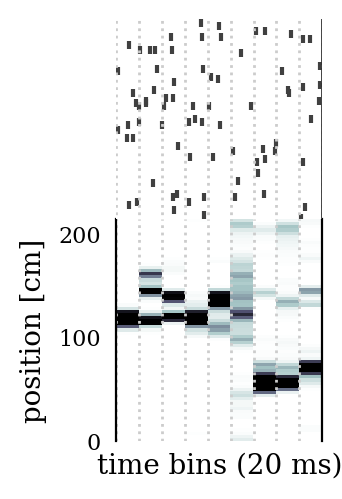

4332


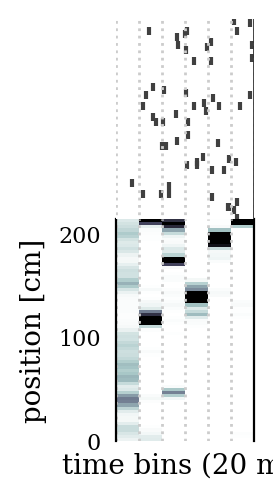

4352


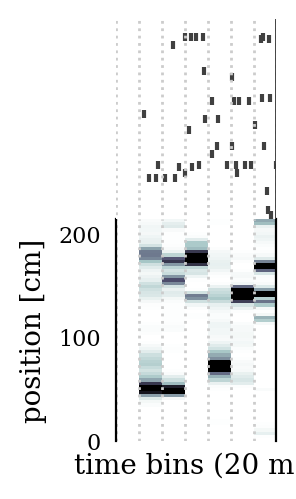

4432


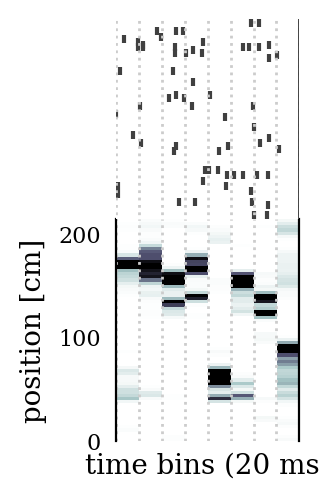

4450


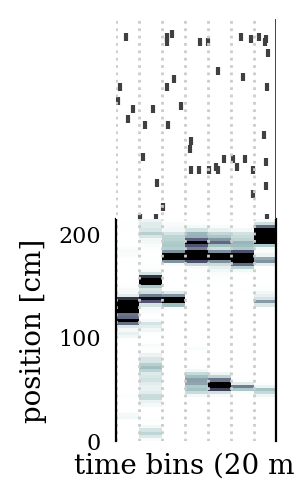

4484


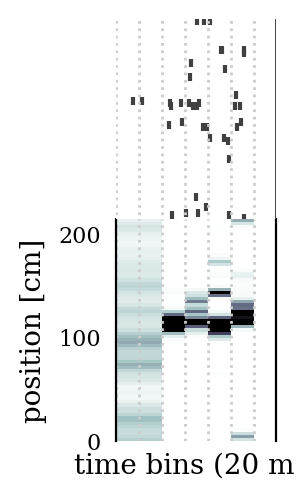

4511


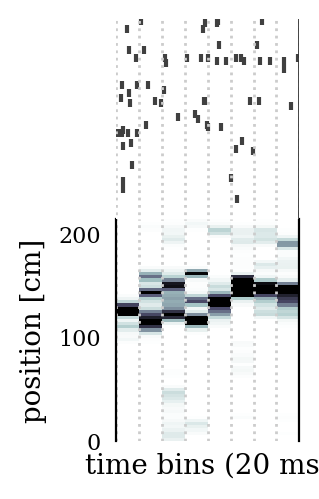

4599


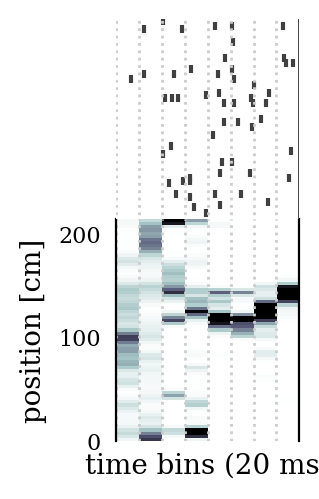

4608


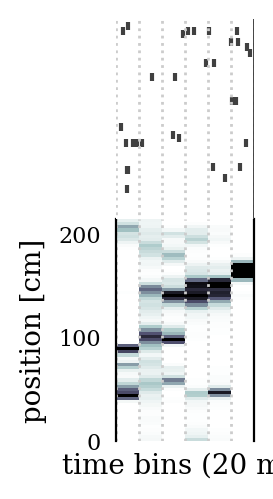

4662


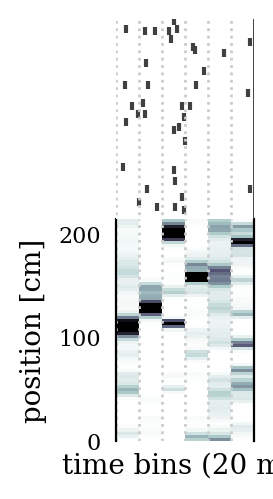

4669


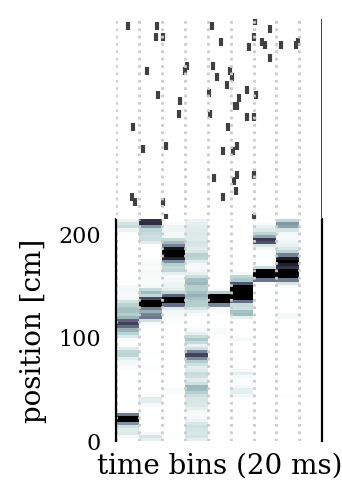

4671


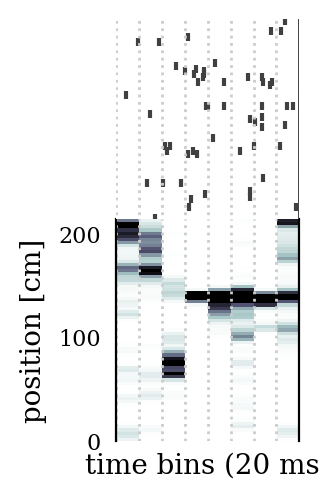

4695


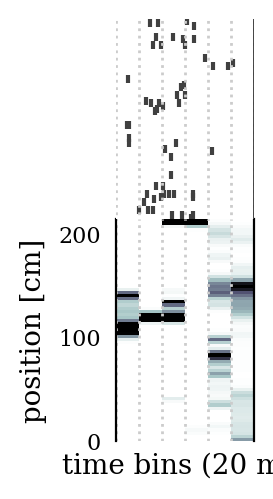

4748


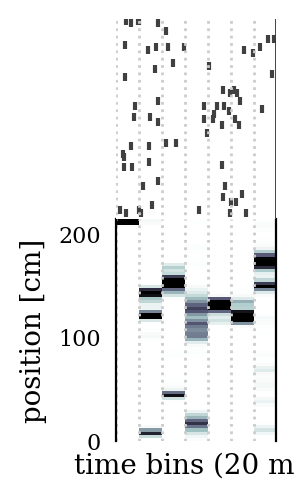

4750


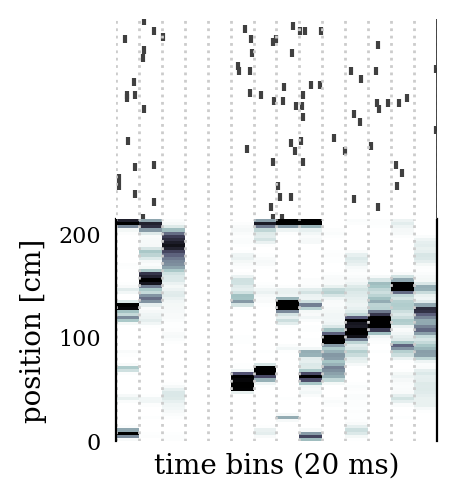

4818


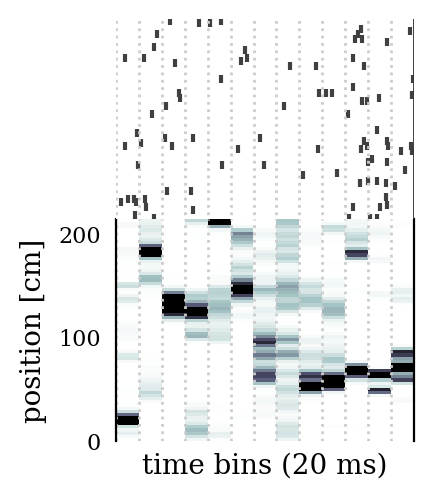

4826


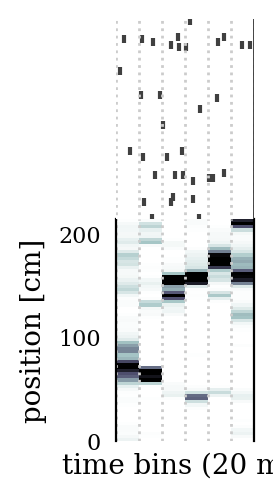

4940


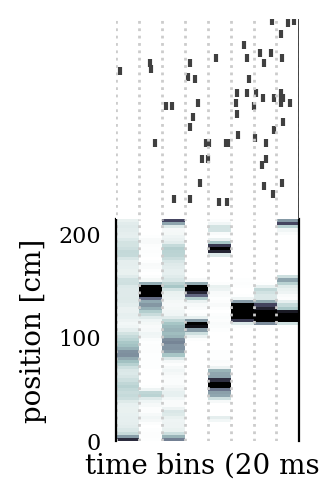

4945


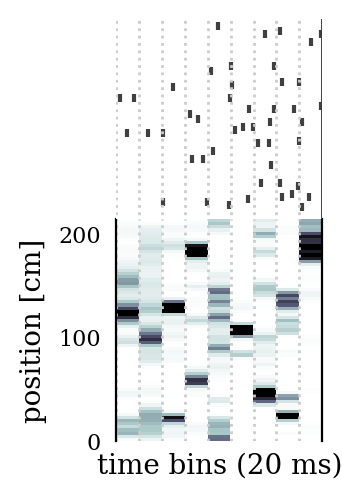

4978


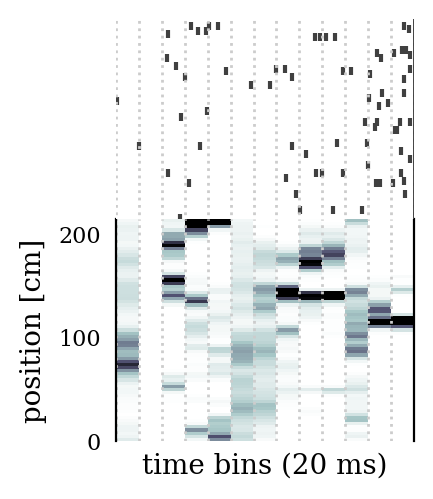

4988


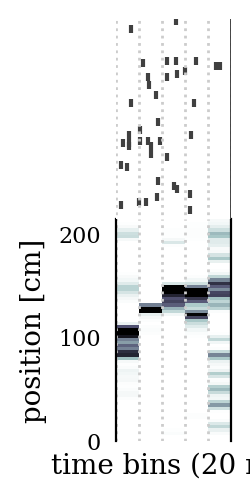

5045


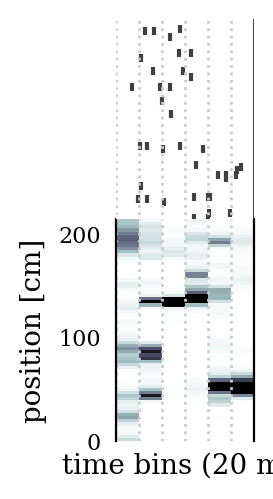

5102


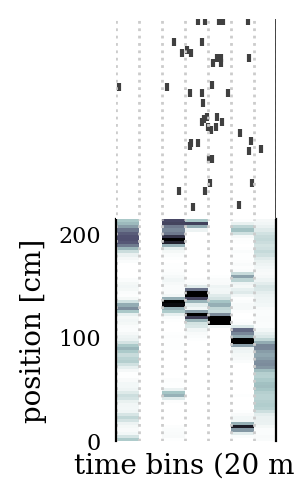

5135


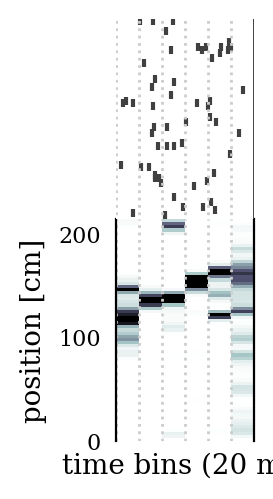

5178


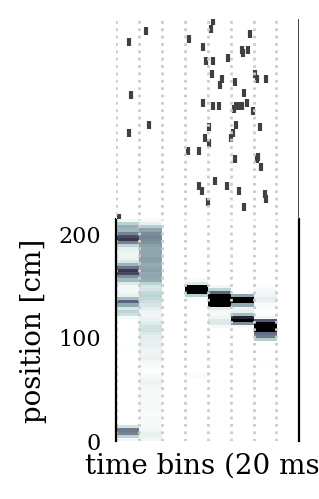

5186


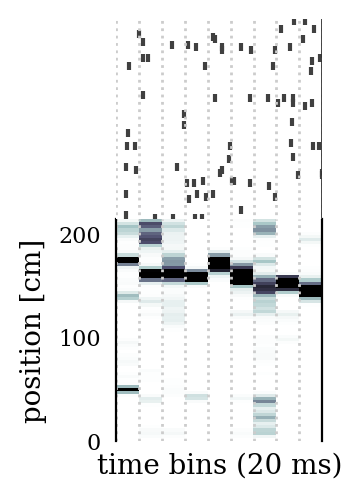

5217


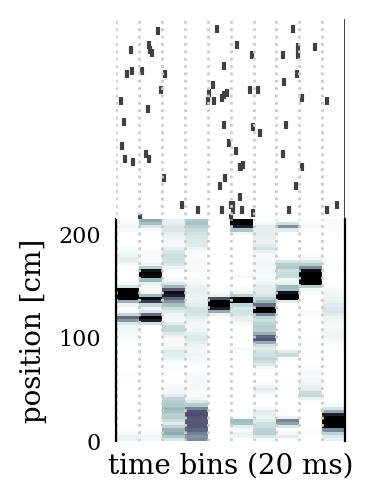

5224


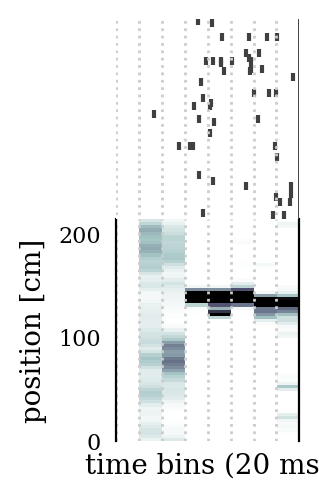

5236


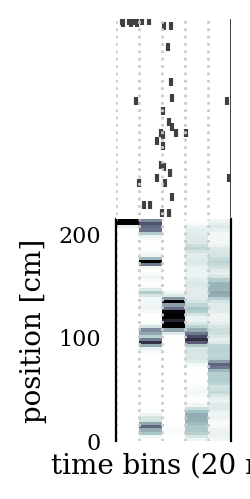

5316


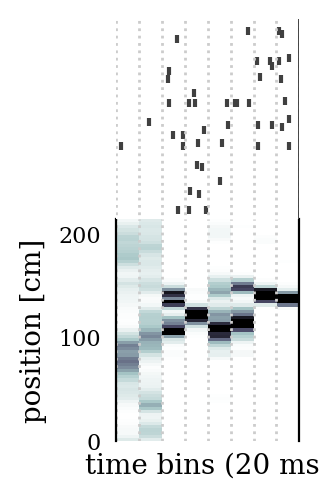

5325


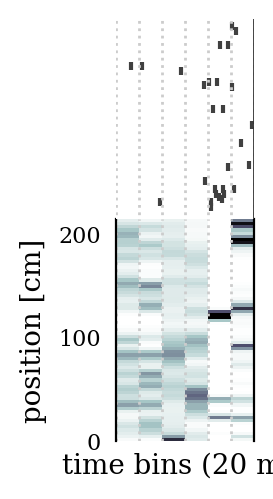

5385


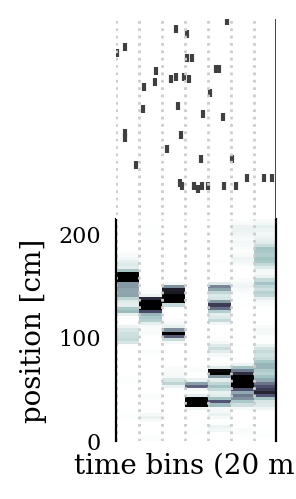

5446


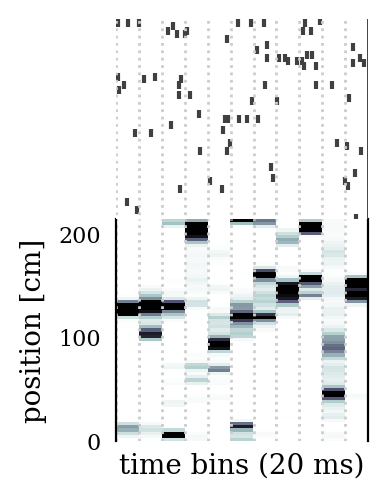

5557


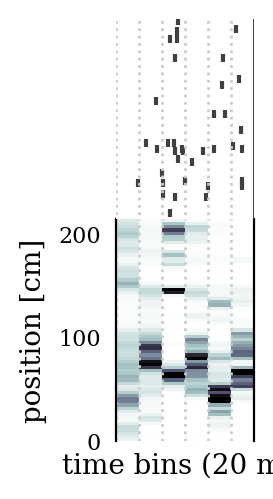

5559


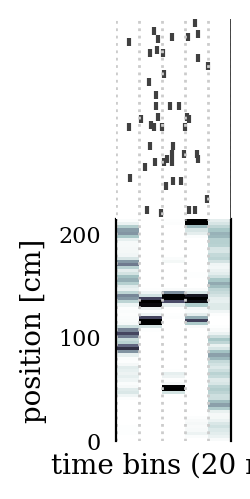

5589


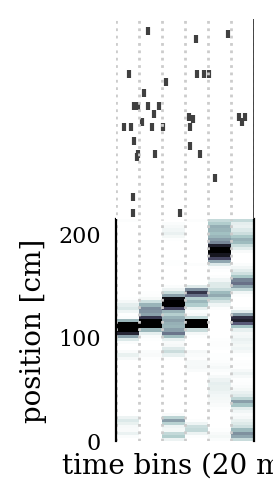

5591


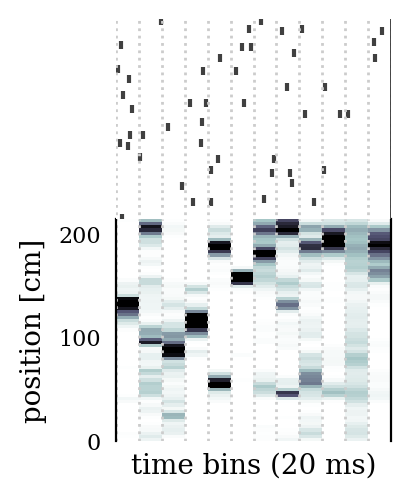

5652


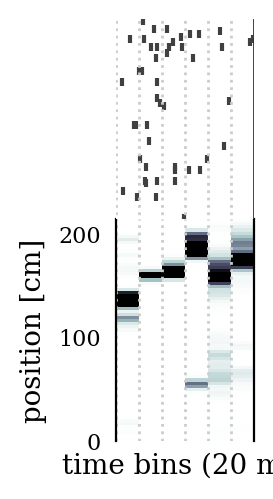

5655


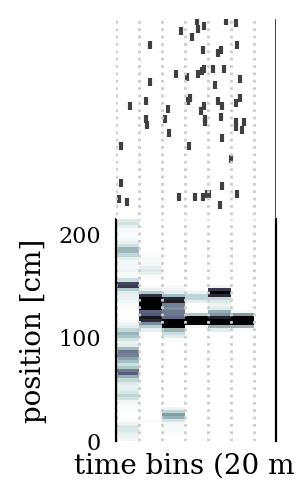

5723


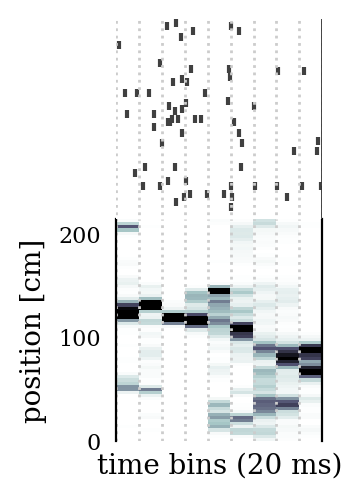

5766


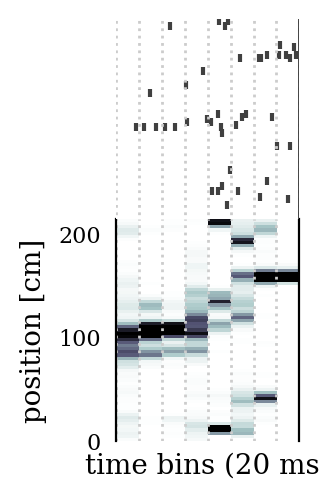

In [5]:

direction = "right_epochs"
alpha = 0.05

idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha)
    & (results[direction]['df']['score_pval_time_swap'] < alpha)
    & (results[direction]['df']['duration'] > 0.1)
)[0]
# idx = [1566, 1197, 1216, 1468, 1967, 1979, 2197]

for i in idx:
    print(i)
    ax, fig = replay_fig.plot_all_replay(
        results[direction]["bst_placecells"][int(i)],
        results[direction]["sta_placecells"],
        results[direction]["tc"],
        results[direction]["tc"],
        vmax=0.1,
        title_str="",
        raster_lw=1.5,
        raster_lh=3,
        rasterized_heatmap=True,
    )

    fig.savefig(
        os.path.join(fig_save_path,"replay_example_individuals", "AZ12_210323_sess3_right_epochs"+str(i)+".jpeg"),
        dpi=300,
        bbox_inches="tight",
    )

    fig.savefig(
        os.path.join(fig_save_path, "replay_example_individuals", "AZ12_210323_sess3_right_epochs"+str(i)+".svg"),
        dpi=300,
        bbox_inches="tight",
    )